## DEEP LEARNING ASSIGNMENT


### Contents of the Notebook <a class="anchor" id="toc"></a>

* [Simple Classification](#f1)
* [Visualization of the Solution](#f2)
* [A More Difficult Classification Problem](#f3)
* [A Regression Problem](#f4)
* [Image Denoising](#f5)

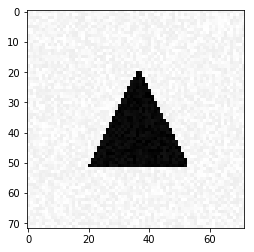

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential, Model, Input
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, concatenate
from keras.layers import UpSampling2D

from mp1 import *

# Simple Classification <a class="anchor" id="f1"></a>

For this simple classification, I start by creating 2 sets : one for training and one for testing.
    
The X contains the features, while the Y is the target.

Since this is a 3-label classification, our target should have 3 columns, where one is equal to 1 and the others are equal to 0 depending on the class.

In [287]:
[X_train, Y_train] = generate_dataset_classification(1001, 20)
[X_test, Y_test] = generate_dataset_classification(301, 20, False)

Creating data:
0
100
200
300
400
500
600
700
800
900
1000
Creating data:
0
100
200
300


In [262]:
Y_train.shape

(1001,)

In [288]:
Y_train = np_utils.to_categorical(Y_train, 3) 
Y_test = np_utils.to_categorical(Y_test, 3)
Y_train.shape

(1001, 3)

## Stochastic Gradient Descent <a class="anchor" id="f1.1"></a>

I start with one dense layer, using the softmax function, and stochastic gradient descent for optimazing the loss function.

Since we're doing a classification, I have chosen the categorical crossentropy as a loss function.

In [264]:
model_sgd = Sequential()
model_sgd.add(Dense(3, activation='softmax', input_shape=(X_train.shape[1],)))
model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_sgd.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


We set a monitor for the fitting, so that if my model achieves a stable performence, the fitting will stop even if there are still epochs left.

This will be used for all the following models.

We will also be using 'validation_split=0.3' in order to avoid over fitting.

In [3]:
early_stopping_monitor = EarlyStopping(patience=5)

In [289]:
model_sgd.fit(X_train, Y_train, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Train on 700 samples, validate on 301 samples
Epoch 1/30
700/700 [==============================] - 0s 203us/step - loss: 10.3156 - acc: 0.3600 - val_loss: 10.2278 - val_acc: 0.3654
Epoch 2/30
700/700 [==============================] - 0s 238us/step - loss: 10.3156 - acc: 0.3600 - val_loss: 10.2278 - val_acc: 0.3654
Epoch 3/30
700/700 [==============================] - 0s 242us/step - loss: 10.3156 - acc: 0.3600 - val_loss: 10.2278 - val_acc: 0.3654
Epoch 4/30
700/700 [==============================] - 0s 250us/step - loss: 10.3156 - acc: 0.3600 - val_loss: 10.2278 - val_acc: 0.3654
Epoch 5/30
700/700 [==============================] - 0s 244us/step - loss: 10.3156 - acc: 0.3600 - val_loss: 10.2278 - val_acc: 0.3654
Epoch 6/30
700/700 [==============================] - 0s 226us/step - loss: 10.3156 - acc: 0.3600 - val_loss: 10.2278 - val_acc: 0.3654


In [290]:
model_sgd.evaluate(X_test, Y_test)

301/301 [==============================] - 0s 117us/step


[11.191634263707158, 0.30564784102661663]

In [278]:
x = generate_a_disk()
x = x.reshape(1, x.shape[0])
model_sgd.predict(x)

array([[1., 0., 0.]], dtype=float32)

In [297]:
Y_test[0:3]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [298]:
model_sgd.predict(X_test)[0:3]

array([[1.0000000e+00, 8.4913066e-13, 3.3294542e-15],
       [1.0000000e+00, 5.0837156e-13, 3.3326038e-16],
       [1.0000000e+00, 1.8586664e-12, 1.6406413e-14]], dtype=float32)

With SGD, the model has a low accuracy, as can be seen when comparing Y_test and the prediction.

Indeed, we end up with a 3 columns array, where each column is a probability that the observation is of the related class. 

For example, if the highest number is the second column's, then the object is a disk.

## Adam Optimizer 

In [279]:
model_adam = Sequential()
model_adam.add(Dense(3, activation='softmax', input_shape=(X_train.shape[1],)))
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_adam.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [291]:
model_adam.fit(X_train, Y_train, batch_size=32, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Train on 700 samples, validate on 301 samples
Epoch 1/30
700/700 [==============================] - 0s 226us/step - loss: 0.0179 - acc: 1.0000 - val_loss: 0.0271 - val_acc: 1.0000
Epoch 2/30
700/700 [==============================] - 0s 225us/step - loss: 0.0195 - acc: 0.9971 - val_loss: 0.0148 - val_acc: 1.0000
Epoch 3/30
700/700 [==============================] - 0s 232us/step - loss: 0.0194 - acc: 0.9986 - val_loss: 0.0164 - val_acc: 1.0000
Epoch 4/30
700/700 [==============================] - 0s 268us/step - loss: 0.0195 - acc: 0.9986 - val_loss: 0.0148 - val_acc: 1.0000
Epoch 5/30
700/700 [==============================] - 0s 227us/step - loss: 0.0137 - acc: 0.9986 - val_loss: 0.0125 - val_acc: 1.0000
Epoch 6/30
700/700 [==============================] - 0s 246us/step - loss: 0.0117 - acc: 1.0000 - val_loss: 0.0111 - val_acc: 1.0000
Epoch 7/30
700/700 [==============================] - 0s 263us/step - loss: 0.0113 - acc: 1.0000 - val_loss: 0.0114 - val_acc: 1.0000
Epoch 8/30
700/7

In [302]:
model_adam.evaluate(X_test, Y_test)

301/301 [==============================] - 0s 132us/step


[0.00501739942279963, 1.0]

In [285]:
model_adam.predict(x)

array([[0., 1., 0.]], dtype=float32)

In [296]:
Y_test[0:3]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [295]:
model_adam.predict(X_test)[0:3]

array([[4.0854607e-04, 1.4337063e-04, 9.9944812e-01],
       [2.3389427e-02, 9.7619104e-01, 4.1946227e-04],
       [9.9857450e-01, 1.3551192e-03, 7.0299095e-05]], dtype=float32)

We end up with a 100% accuracy by using the adam optimizer.

Again, the values predicted are probabilities. For the first observation, the highest value is the 3rd column's, and we can indeed see in the Y_test that the 3rd column has value 1.

# Visualization of the Solution <a class="anchor" id="f2"></a>

In [117]:
w_sgd = model_sgd.get_weights()
w_adam = model_adam.get_weights()
w_adam

[array([[ 0.02113169, -0.01412559, -0.00226412],
        [ 0.01962933,  0.00786134, -0.03136186],
        [-0.00658829,  0.00284222,  0.00738862],
        ...,
        [ 0.02212913,  0.0326816 ,  0.02466591],
        [ 0.01251445,  0.02918949,  0.0193525 ],
        [-0.00953906, -0.02067684,  0.0016315 ]], dtype=float32),
 array([ 0.0017674 ,  0.00043431, -0.00112944], dtype=float32)]

In [4]:
IMAGE_SIZE = 72

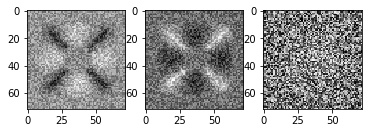

In [299]:
plt.subplots(1,3)
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(w_sgd[0][:,i].reshape((IMAGE_SIZE,IMAGE_SIZE)), cmap='gray')
plt.show()

We notice that for the SGD model, the 3rd column's weight is too noisy.

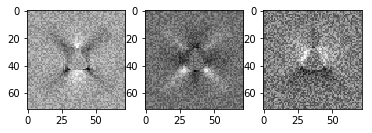

In [120]:
plt.subplots(3,1)
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(w_adam[0][:,i].reshape((IMAGE_SIZE,IMAGE_SIZE)), cmap='gray')
plt.show()

For the adam model on the other hand, the 3 weights are relatively clear.

# A More Difficult Classification Problem <a class="anchor" id="f3"></a>

We use different data for this problem, since we have movement.

In [121]:
[X_train_mv, Y_train_mv] = generate_dataset_classification(1001, 20, True)
[X_test_mv, Y_test_mv] = generate_test_set_classification()
Y_train_mv = np_utils.to_categorical(Y_train_mv, 3) 

Creating data:
0
100
200
300
400
500
600
700
800
900
1000
Creating data:
0
100
200


Since Adam optimizer gave excellent results earlier, I will be using it again.

In [153]:
model_cv = Sequential()
model_cv.add(Conv2D(16, 5, input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model_cv.add(MaxPooling2D(pool_size=3))
model_cv.add(Flatten())
model_cv.add(Dense(3, activation='softmax'))
model_cv.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 22, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 23235     
Total params: 23,651
Trainable params: 23,651
Non-trainable params: 0
_________________________________________________________________


In [300]:
model_cv.fit(X_train_mv.reshape(X_train_mv.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1), Y_train_mv, batch_size=32, 
             validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Train on 700 samples, validate on 301 samples
Epoch 1/30
700/700 [==============================] - 4s 6ms/step - loss: 1.1607 - acc: 0.4086 - val_loss: 1.0503 - val_acc: 0.5947
Epoch 2/30
700/700 [==============================] - 2s 3ms/step - loss: 0.9582 - acc: 0.6143 - val_loss: 0.9402 - val_acc: 0.6213
Epoch 3/30
700/700 [==============================] - 2s 3ms/step - loss: 0.8676 - acc: 0.6271 - val_loss: 0.8568 - val_acc: 0.6412
Epoch 4/30
700/700 [==============================] - 2s 3ms/step - loss: 0.7871 - acc: 0.6757 - val_loss: 0.7999 - val_acc: 0.6246
Epoch 5/30
700/700 [==============================] - 3s 4ms/step - loss: 0.7294 - acc: 0.7286 - val_loss: 0.7691 - val_acc: 0.6478
Epoch 6/30
700/700 [==============================] - 2s 3ms/step - loss: 0.6789 - acc: 0.7271 - val_loss: 0.7106 - val_acc: 0.6910
Epoch 7/30
700/700 [==============================] - 2s 3ms/step - loss: 0.6272 - acc: 0.7686 - val_loss: 0.7052 - val_acc: 0.7276
Epoch 8/30
700/700 [==========

In [303]:
model_cv.evaluate(X_test_mv.reshape(X_test_mv.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1), Y_test_mv)

300/300 [==============================] - 0s 2ms/step


[0.4522938891251882, 0.8399999992052714]

In [304]:
Y_test_mv[0:3]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [305]:
model_cv.predict(X_test_mv.reshape(X_test_mv.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1))[0:3]

array([[0.29383966, 0.5832034 , 0.122957  ],
       [0.05558728, 0.24579816, 0.6986145 ],
       [0.2847046 , 0.61815315, 0.09714222]], dtype=float32)

We end up with a pretty decent accuracy of around 84%, but much lower than previously (100%).

# A Regression Problem <a class="anchor" id="f4"></a>

This time, the target is the coordinates of a triangle's veticles, which gives us 6 columns (2 coordinates for each point)

Creating data:
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
Creating data:
0
100
200


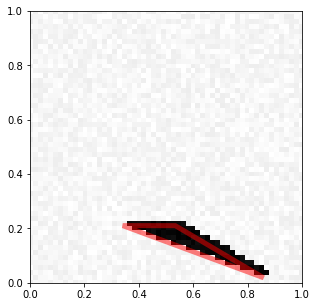

In [148]:
[X_train_reg, Y_train_reg] = generate_dataset_regression(3001, 20)
[X_test_reg, Y_test_reg] = generate_test_set_regression()
mp1.visualize_prediction(X_train_reg[0], Y_train_reg[0])

In order to facilitate the learning process, we should give our model an already sorted set of coordinate couples. The verticle that's most to the left will always be given first, etc.

The following functions allow the sorting.

In [ ]:
#Ordonner selon les abscisses
def order(list_triangles):
    for i in range(list_triangles.shape[0]):
        list_triangles[i] = ord_abs(list_triangles[i])
    return list_triangles

def ord_abs(triangle):
    for i in range(2):
        triangle = test_abs(triangle, 2*i, 2*(i+1))
    return test_abs(triangle, 0,2)
            
def test_abs(triangle,i,j):
    if(triangle[i] > triangle[j]):
        tmp = [triangle[i], triangle[i+1]]
        triangle[i] = triangle[j]
        triangle[i+1] = triangle[j+1]
        triangle[j] = tmp[0]
        triangle[j+1] = tmp[1]
    return triangle

This time, we're doing a regression, so we will use the MSE (mean squared error) as a loss function.

In [154]:
model_reg = Sequential()
model_reg.add(BatchNormalization(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
model_reg.add(Conv2D(16, 5, padding='same', activation='relu'))
model_reg.add(MaxPooling2D(pool_size=3))
model_reg.add(Conv2D(64, 4, padding='same', activation='relu'))
model_reg.add(MaxPooling2D(pool_size=3))
model_reg.add(Dropout(0.3))
model_reg.add(Flatten())
model_reg.add(Dense(128, activation='relu'))
model_reg.add(Dense(64, activation='relu'))
model_reg.add(Dense(6))
model_reg.compile(optimizer='adam', loss='mean_squared_error')
model_reg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 72, 72, 1)         4         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 16)        416       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        16448     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
__________

In [306]:
Y_train_reg = order(Y_train_reg)
model_reg.fit(X_train_reg.reshape(X_train_reg.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1), Y_train_reg, batch_size=32, 
              validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Train on 2100 samples, validate on 901 samples
Epoch 1/30
2100/2100 [==============================] - 17s 8ms/step - loss: 0.0413 - val_loss: 0.0220
Epoch 2/30
2100/2100 [==============================] - 15s 7ms/step - loss: 0.0193 - val_loss: 0.0142
Epoch 3/30
2100/2100 [==============================] - 15s 7ms/step - loss: 0.0129 - val_loss: 0.0111
Epoch 4/30
2100/2100 [==============================] - 15s 7ms/step - loss: 0.0104 - val_loss: 0.0101
Epoch 5/30
2100/2100 [==============================] - 15s 7ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 6/30
2100/2100 [==============================] - 15s 7ms/step - loss: 0.0073 - val_loss: 0.0085
Epoch 7/30
2100/2100 [==============================] - 14s 7ms/step - loss: 0.0064 - val_loss: 0.0071
Epoch 8/30
2100/2100 [==============================] - 15s 7ms/step - loss: 0.0054 - val_loss: 0.0071
Epoch 9/30
2100/2100 [==============================] - 15s 7ms/step - loss: 0.0051 - val_loss: 0.0068
Epoch 10/30
2100/2100 [===

In [151]:
Y_test_reg = order(Y_test_reg)
model_reg.evaluate(X_test_reg.reshape(X_test_reg.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1), Y_test_reg)

300/300 [==============================] - 1s 3ms/step


0.006464035026729107

We end up with an extremely low loss function, so the model is expected to perform very well.

By visualizing the 10 first predictions on the test set, we see that while the model isn't perfect, it still gives decent results. 

Perhaps using a bigger training set, or tuning the model layers more would give better results.

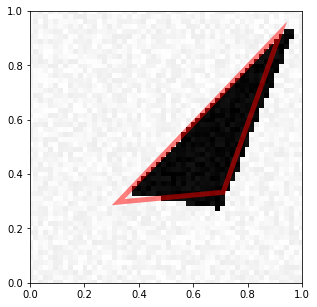

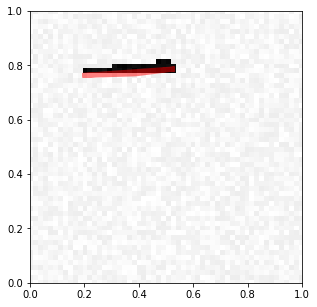

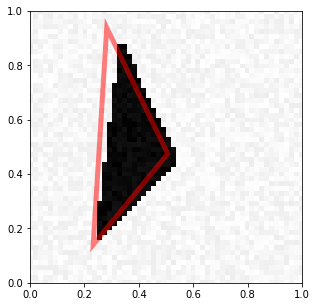

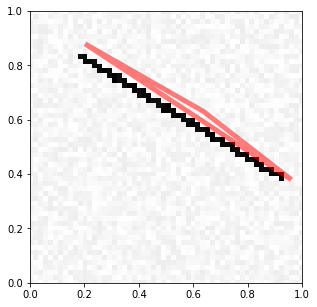

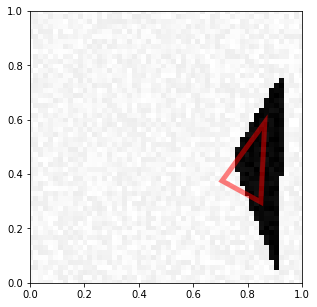

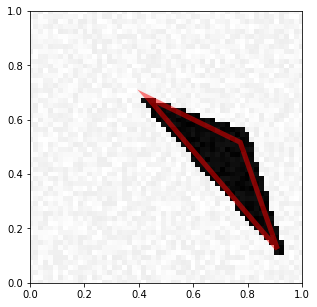

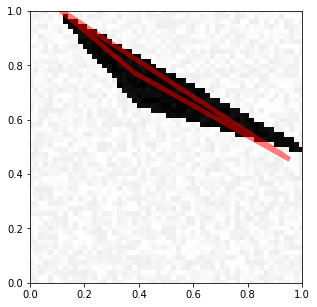

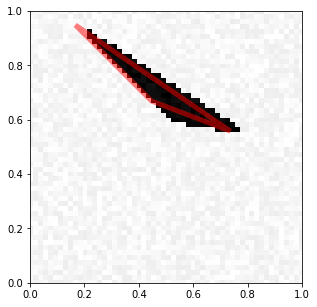

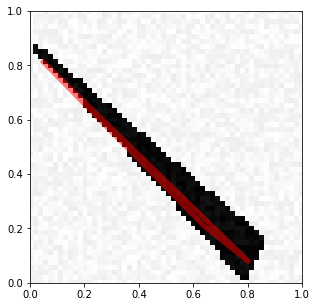

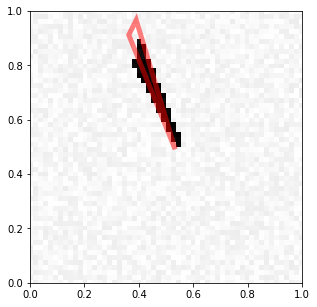

In [152]:
Y_pred = model_reg.predict(X_test_reg.reshape(X_test_reg.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1))
for i in range(10):
    mp1.visualize_prediction(X_test_reg[i], Y_pred[i])

# Image Denoising <a class="anchor" id="f5"></a>

First, we need to create our new data. 

The target Y is now equivalent of the input X without the noise.

The following functions are used to create both the input and the target :

In [5]:
def generate_a_rectangle_noise(free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return figsize, U, V

def generate_a_disk_noise(free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return figsize, U, V

def generate_dataset_noise(nb_samples, noise, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(2)
        #noise = np.random.randint(200)
        if category == 0:
            figsize, U, V = generate_a_rectangle_noise(free_location)
        elif category == 1: 
            figsize, U, V = generate_a_disk_noise(free_location)
        X[i] = generate_a_drawing(figsize, U, V, noise)
        Y[i] = generate_a_drawing(figsize, U, V, 0.0)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [6]:
[X_train_noise, Y_train_noise] = generate_dataset_noise(3001, 200)
[X_test_noise, Y_test_noise] = generate_dataset_noise(301, 200)

Creating data:
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
Creating data:
0
100
200
300


On the left, we plot the input X (figure with noise), while on the right we plot the target Y.

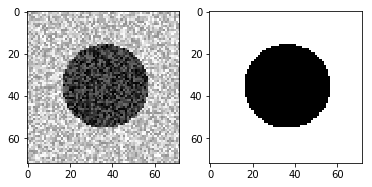

In [7]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(X_train_noise[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(Y_train_noise[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

In [8]:
inputs = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))
batch = BatchNormalization()(inputs)
conv1a = Conv2D(8, 2, activation = 'relu', padding='same')(batch)
conv1b = Conv2D(8, 2, activation = 'relu', padding='same')(conv1a)

pool2 = MaxPooling2D(pool_size=2)(conv1b)
conv2a = Conv2D(16, 2, activation = 'relu', padding='same')(pool2)
conv2b = Conv2D(16, 2, activation = 'relu', padding='same')(conv2a)

pool3 = MaxPooling2D(pool_size=2)(conv2b)

up4 = UpSampling2D(size = (2,2))(pool3)
conv4a = Conv2D(32, 3, activation = 'relu', padding='same')(up4)
# We connect layers that are on the same level, but on opposite sides
merge1 = concatenate([conv2b, conv4a], axis=3)
conv4b = Conv2D(32, 3, activation = 'relu', padding='same')(conv4a)

up5 = UpSampling2D(size = (2,2))(conv4b)
conv5a = Conv2D(16, 3, activation = 'relu', padding='same')(up5)
merge2 = concatenate([conv1b, conv5a], axis=3)
conv5b = Conv2D(16, 3, activation = 'relu', padding='same')(conv5a)

conv6= Conv2D(1, 1, activation = 'relu', padding='same')(conv5b)

model = Model(input = inputs, output = conv6)
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 72, 72, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 8)         40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 8)         264       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 16)        528       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 36, 36, 16)        1040      
__________

/home/rym/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [9]:
model.fit(X_train_noise.reshape(X_train_noise.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1), 
          Y_train_noise.reshape(Y_train_noise.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1),
          batch_size=32, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Train on 2100 samples, validate on 901 samples
Epoch 1/30
2100/2100 [==============================] - 72s 34ms/step - loss: 21059.0482 - val_loss: 5751.4115
Epoch 2/30
2100/2100 [==============================] - 73s 35ms/step - loss: 4375.4303 - val_loss: 3451.3268
Epoch 3/30
2100/2100 [==============================] - 67s 32ms/step - loss: 2773.4009 - val_loss: 2092.0054
Epoch 4/30
2100/2100 [==============================] - 69s 33ms/step - loss: 1612.9672 - val_loss: 1083.2776
Epoch 5/30
2100/2100 [==============================] - 65s 31ms/step - loss: 965.8040 - val_loss: 763.0586
Epoch 6/30
2100/2100 [==============================] - 68s 32ms/step - loss: 754.5696 - val_loss: 548.6909
Epoch 7/30
2100/2100 [==============================] - 68s 32ms/step - loss: 591.7093 - val_loss: 492.5650
Epoch 8/30
2100/2100 [==============================] - 71s 34ms/step - loss: 474.1840 - val_loss: 470.9719
Epoch 9/30
2100/2100 [==============================] - 70s 33ms/step - loss: 44

In [307]:
model.evaluate(X_test_noise.reshape(X_test_noise.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1), 
              Y_test_noise.reshape(Y_test_noise.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1))

301/301 [==============================] - 2s 7ms/step


147.89333726242927

We notice that the loss function is pretty high.

In [10]:
Y_pred_noise = model.predict(X_test_noise.reshape(X_test_noise.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1))
Y_pred_noise = Y_pred_noise.reshape(Y_pred_noise.shape[0], IMAGE_SIZE, IMAGE_SIZE)
Y_pred_noise.shape

(301, 72, 72)

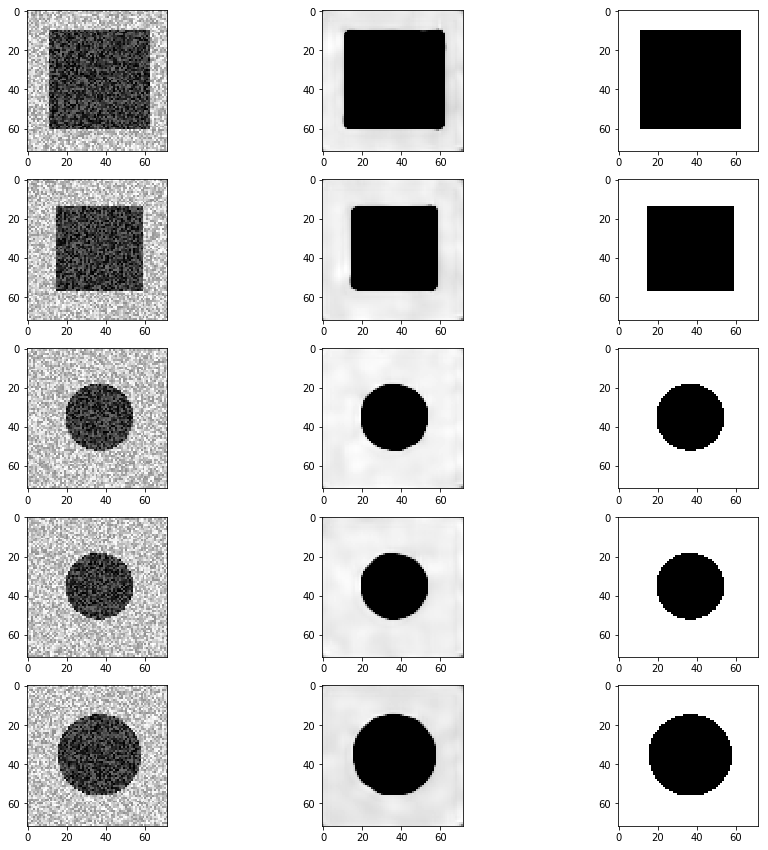

In [14]:
plt.subplots(5, 3, figsize=(15,15))
for i in range(5):
    plt.subplot(5,3,3*i+1)
    plt.imshow(X_test_noise[i].reshape((IMAGE_SIZE,IMAGE_SIZE)), cmap='gray')
    plt.subplot(5,3,3*i+2)
    plt.imshow(Y_pred_noise[i], cmap='gray')
    plt.subplot(5,3,3*i+3)
    plt.imshow(Y_test_noise[i].reshape((IMAGE_SIZE,IMAGE_SIZE)), cmap='gray')
plt.show()

I can see that there's still a shade of grey behind all the predicted shapes.